<a href="https://colab.research.google.com/github/lephuocdat2000/-CS114.K21-/blob/master/Round2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import pyplot 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

Lấy data từ link về


In [1]:
!wget http://cs.uit.edu.vn/data2.txt
!ls

--2020-06-12 08:51:32--  http://cs.uit.edu.vn/data2.txt
Resolving cs.uit.edu.vn (cs.uit.edu.vn)... 118.69.123.142
Connecting to cs.uit.edu.vn (cs.uit.edu.vn)|118.69.123.142|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1203726 (1.1M) [text/plain]
Saving to: ‘data2.txt’

data2.txt           100%[===================>]   1.15M  1.16MB/s    in 1.0s    

2020-06-12 08:51:34 (1.16 MB/s) - ‘data2.txt’ saved [1203726/1203726]

data2.txt  sample_data


Đọc dữ liệu và thêm cột log2complexity,squarecomplexity,tách bộ dữ liệu

In [0]:
data=pd.read_csv('data2.txt',header=None)
data.columns=['Complexity','Timing']
data=data.assign(Square=np.power(data['Complexity'],2),Logarit=np.log2(data['Complexity'],where=(data['Complexity']!=0))*data['Complexity'])
data=data[['Complexity','Square','Logarit','Timing']]
x=data[['Complexity','Square','Logarit']]
y=data[['Timing']]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,)

Lựa chọn model và fit bộ dữ liệu X_train.values và y_train.values

In [10]:
model=LinearRegression().fit(X_train.values,y_train.values)
print("Slope: ",model.coef_)
print("Intercept: ",model.intercept_)
y_fit=model.predict(X_train.values)

Slope:  [[ 5.83032786e-09 -1.08268401e-18  3.35155096e-09]]
Intercept:  [0.00017337]


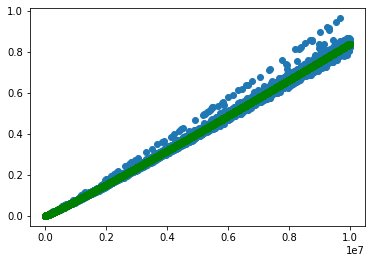

In [14]:
y_predict=model.predict(X_test.values)
plt.scatter(X_test['Complexity'].values,y_test.values)
plt.plot(X_test['Complexity'].values,y_predict,'go')

Ứng dụng dự đoán cho model

In [18]:
def Prediction(x,train=X_train,model=model):
   squarex=np.power(x,2)
   log2x=np.log2(x,where=(x!=0))*x
   arr=np.array([[x,squarex,log2x]])
   pred=model.predict(arr)
   print("Thoi gian du tinh cua thuat toan voi do phuc tap ",x," la: ",pred[0][0])
Prediction(4426776)

Thoi gian du tinh cua thuat toan voi do phuc tap  4426776  la:  0.35352079748628906


In [0]:
Dự đoán hiệu suất mô hình bằng R square error

In [20]:
r2_score(y_test,y_predict)

0.997928149707664